In [100]:
!pip3 install tabulate

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
matplotlib.rc('font', family = 'AppleGothic')
matplotlib.rc('axes', unicode_minus = False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [102]:
onlinesales = pd.read_csv('Onlinesales_info.csv')
customer_info = pd.read_csv('Customer_info.csv')
marketing_info = pd.read_csv('Marketing_info.csv')
Discount_info = pd.read_csv('Discount_info.csv')
Tax_info = pd.read_csv('Tax_info.csv')

onlinesales.info()

In [103]:
onlinesales.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


## 1. EDA (탐색적 데이터 분석)

### 1. 제품 카테고리별 주문횟수 및 총 주문 수량 도출

In [104]:
# 제품 카테고리
category_order_counts = onlinesales.groupby('제품카테고리').size().reset_index(name ='주문 횟수')
category_total_quantity = onlinesales.groupby('제품카테고리')['수량'].sum().reset_index(name = '총주문량')

# 결과 결합
category_order_info = pd.merge(category_order_counts, category_total_quantity, on ='제품카테고리')
# 내림차순으로 정렬
category_order_info_sorted = category_order_info.sort_values(by='주문 횟수', ascending=False)
#평균구매수량 = 총주문량 / 주문횟수
category_order_info_sorted['평균구매수량'] = category_order_info_sorted['총주문량'] / category_order_info_sorted['주문 횟수']
print(category_order_info_sorted.to_markdown(index = False))

| 제품카테고리         |   주문 횟수 |   총주문량 |   평균구매수량 |
|:---------------------|------------:|-----------:|---------------:|
| Apparel              |       18126 |      32438 |        1.78958 |
| Nest-USA             |       14013 |      21430 |        1.52929 |
| Office               |        6513 |      88383 |       13.5702  |
| Drinkware            |        3483 |      30501 |        8.75711 |
| Lifestyle            |        3092 |      24881 |        8.0469  |
| Nest                 |        2198 |       2837 |        1.29072 |
| Bags                 |        1882 |      15273 |        8.1153  |
| Headgear             |         771 |       3533 |        4.58236 |
| Notebooks & Journals |         749 |       9556 |       12.7583  |
| Waze                 |         554 |       1144 |        2.06498 |
| Nest-Canada          |         317 |        469 |        1.4795  |
| Bottles              |         268 |       2090 |        7.79851 |
| Accessories          |         234 |       1097 |   

#### 제품 카테고리별 주문횟수 및 총 주문 수량 도출(분석)
##### - 제품 카테고리의 주문횟수와 총 주문량 및 평균 구매수량을 확인했다.
##### - 결과를 보면 총 주문횟수가 많아도 제품구매 수량은 높지 않은 것을 볼 수 있다.

###

### 2. 제품 카테고리별 쿠폰 사용여부 

In [105]:
# 제품 카테고리별 쿠폰 사용 여부 확인
coupon_usage = onlinesales.groupby(['제품카테고리', '쿠폰상태']).size().unstack(fill_value=0)

# 쿠폰 사용 비율 확인(쿠폰 사용 건 / 총 쿠폰 사용 건 수)
coupon_usage['Clicked Rate'] = coupon_usage['Clicked'] / (coupon_usage['Used'] + coupon_usage['Not Used'] + coupon_usage['Clicked'])
coupon_usage['Used Rate'] = coupon_usage['Used'] / (coupon_usage['Used'] + coupon_usage['Not Used'] + coupon_usage['Clicked'])
coupon_usage['Not Used Rate'] = coupon_usage['Not Used'] / (coupon_usage['Used'] + coupon_usage['Not Used'] + coupon_usage['Clicked'])

# 'Clicked Rate', 'Used Rate', 'Not Used Rate'의 특성만 추출
print(coupon_usage[['Clicked Rate', 'Used Rate', 'Not Used Rate']])

쿠폰상태                  Clicked Rate  Used Rate  Not Used Rate
제품카테고리                                                      
Accessories               0.534188   0.329060       0.136752
Android                   0.534884   0.232558       0.232558
Apparel                   0.508827   0.339623       0.151550
Backpacks                 0.528090   0.303371       0.168539
Bags                      0.516472   0.332094       0.151435
Bottles                   0.514925   0.305970       0.179104
Drinkware                 0.503015   0.333333       0.163652
Fun                       0.518750   0.325000       0.156250
Gift Cards                0.509434   0.352201       0.138365
Google                    0.485714   0.276190       0.238095
Headgear                  0.520104   0.332036       0.147860
Housewares                0.557377   0.295082       0.147541
Lifestyle                 0.494502   0.356080       0.149418
More Bags                 0.543478   0.391304       0.065217
Nest                    

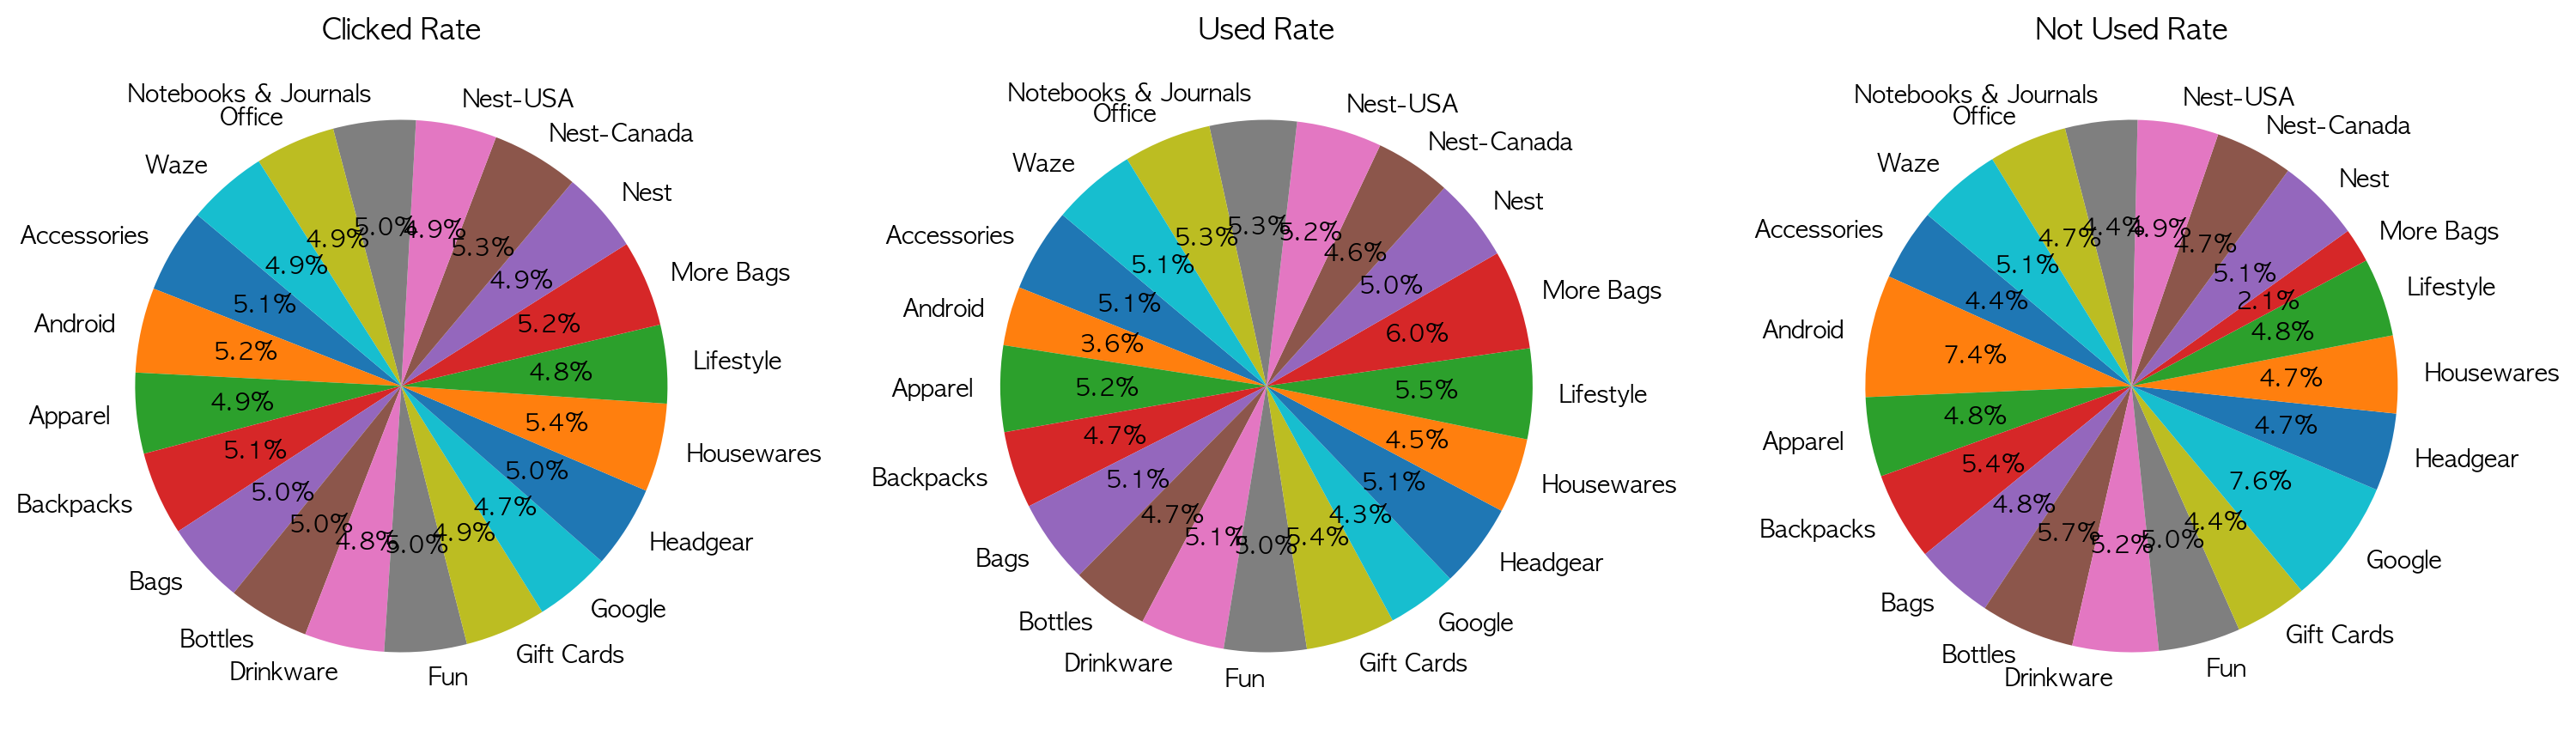

In [106]:
import matplotlib.pyplot as plt

# 쿠폰 상태에 따른 비율 데이터
categories = coupon_usage.index
clicked_rate = coupon_usage['Clicked Rate']
used_rate = coupon_usage['Used Rate']
not_used_rate = coupon_usage['Not Used Rate']

# 원 그래프
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True, squeeze=False, gridspec_kw={'wspace': 0.3})

# 제품 카테고리별로 쿠폰 상태 비율을 원 그래프로 표시
# 첫번째 서브플롯
axes[0, 0].pie(clicked_rate, labels=categories, autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('Clicked Rate')

# 두번째 서브플롯
axes[0, 1].pie(used_rate, labels=categories, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('Used Rate')

# 세번째 서브플롯
axes[0, 2].pie(not_used_rate, labels=categories, autopct='%1.1f%%', startangle=140)
axes[0, 2].set_title('Not Used Rate')
plt.show()

#### 제품 카테고리별 쿠폰 사용여부(분석)
##### - 각 제품 카테고리의 클릭률이 50% 이상이다. 쿠폰을 사용하기 위해서 클릭을 했지만, 실제로 쿠폰을 사용하지 않았다는 말이다.
##### - 쿠폰 사용률 그래프를 보면 30% 이상이 제품을 구매할 때 쿠폰을 사용하였다. 특히 More Bags 카테고리에서 사용율이 많은 것을 볼 수 있다.

###

### 3. 지역별 평균 배송료

In [107]:
### 고객 정보와 온라인 판매 정보 결합
merged_data = pd.merge(onlinesales, customer_info[['고객ID', '고객지역']], on='고객ID', how='left')

#지역별 평균 배송비 계산
city_delivery_fee = merged_data.groupby('고객지역')['배송료'].mean().reset_index()
print(city_delivery_fee)

            고객지역        배송료
0     California  10.718275
1        Chicago  10.507412
2     New Jersey   9.496165
3       New York  10.698711
4  Washington DC  10.344374


#### 지역별 평균 배송료(분석)
##### - 지역별로 배송료는 9 ~ 10$ 정도로 보인다. 한화로 9천원에서 1만원 정도

###

### 4. 지역별 고객 수
#### 4.1 지역별 고객 수 

In [108]:
customer_info['고객지역'].value_counts()

California       464
Chicago          456
New York         324
New Jersey       149
Washington DC     75
Name: 고객지역, dtype: int64

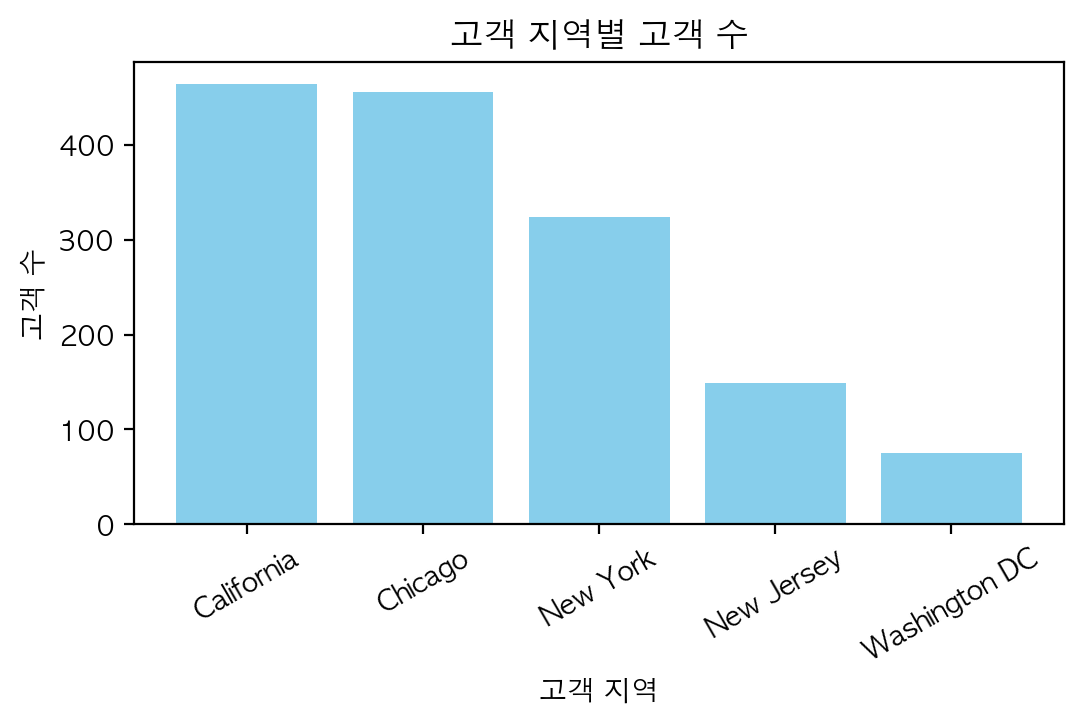

In [109]:
customer_city_consumer_rate = customer_info['고객지역'].value_counts()

# 막대 그래프 그리기
plt.figure(figsize=(6, 3))
plt.bar(customer_city_consumer_rate.index, customer_city_consumer_rate.values, color='skyblue')
plt.xlabel('고객 지역')
plt.ylabel('고객 수')
plt.title('고객 지역별 고객 수')
plt.xticks(rotation=30)  # x축 레이블 회전
plt.show()


#### 4.2 남녀 고객 수 및 지역별 남녀 고객 비율

In [110]:
customer_sex_consumer_rate = customer_info.groupby(['고객지역', '성별']).size().unstack(fill_value=0)
print(customer_sex_consumer_rate)

성별               남    여
고객지역                   
California     165  299
Chicago        171  285
New Jersey      52   97
New York       111  213
Washington DC   35   40


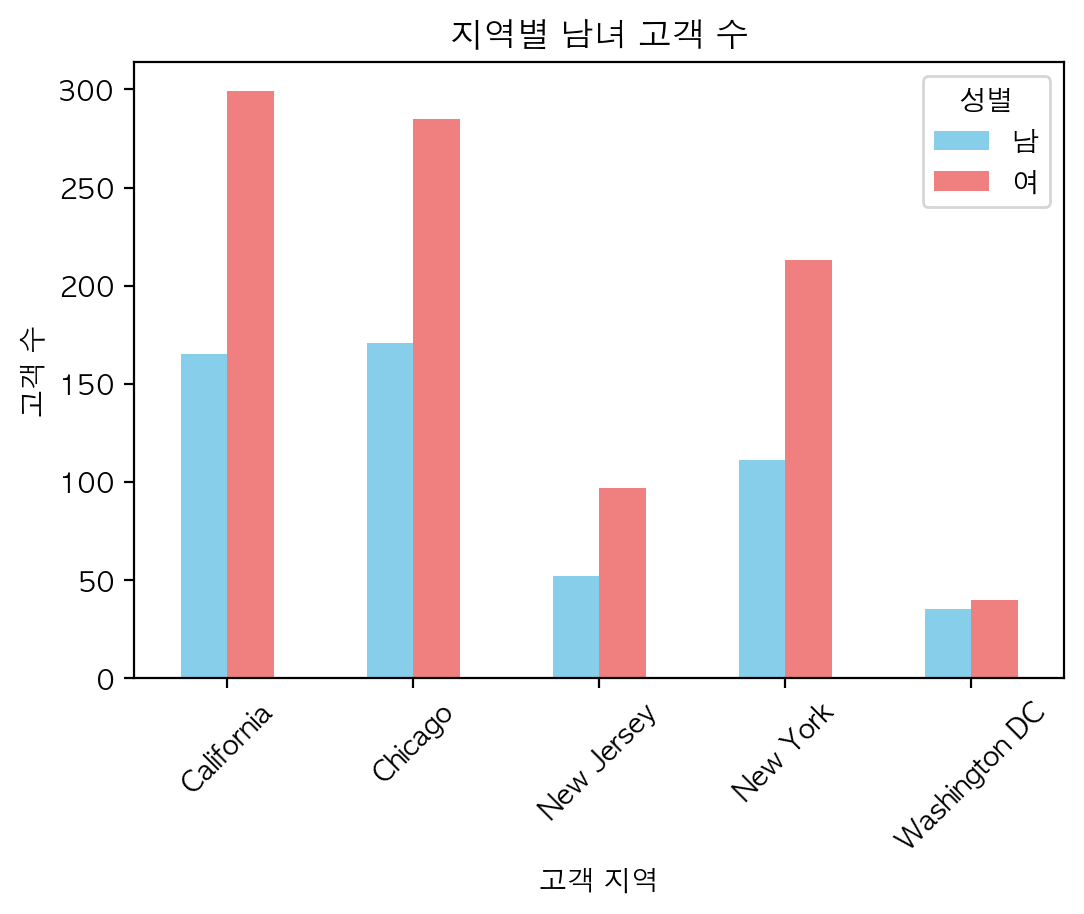

In [111]:
# 막대 그래프로 시각화
ax = customer_sex_consumer_rate.plot(kind='bar', figsize=(6, 4), color=['skyblue', 'lightcoral'])
plt.title('지역별 남녀 고객 수')
plt.xlabel('고객 지역')
plt.ylabel('고객 수')
plt.xticks(rotation=45)
plt.legend(title='성별')
plt.show()

#### 지역별 고객 수(분석)
##### - 지역별로 고객 수를 분석한 결과 남자 고객 보다 여자 고객이 더 많은 것을 볼 수 있다.

###

### 5.가입기간에 따른 고객 수

In [112]:
# 구간 설정
bins = [0,12, 24, 36, float('inf')]
labels = ['1~12개월', '13~24개월', '25~36개월', '37개월 이후']  # 구간별 레이블
customer_info['가입기간 구간'] = pd.cut(customer_info['가입기간'], bins=bins, labels=labels)

#구간별 고객 수 도출
customer_count_by_period_group = customer_info['가입기간 구간'].value_counts().reset_index(name='고객 수').rename(columns={'index': '가입기간 구간'})
customer_count_by_period_group

,가입기간 구간,고객 수
0,37개월 이후,414
1,25~36개월,366
2,13~24개월,361
3,1~12개월,327


#### 가입기간에 따른 고객 수(분석)
##### - 약 1년씩 끊어서 가입 고객 수를 분석하였다.
##### - 가입구간을 보았을 때 매년 꾸준히 신규 고객이 유입되고 있는 것을 볼 수 있다. 또한 매년 300명 이상의 고객이 유입되는 것을 볼 수 있다.

### 

#### 6. 마케팅 비용에 따른 매출액 현황 파악

#### 6.1 월별 매출액 데이터 생성 (매출액 = 수량×평균금액(상품원가)＋배송료)

In [113]:
# 매출액
onlinesales['매출액'] = onlinesales['평균금액'] * onlinesales['수량'] + onlinesales['배송료']
# onlinesales에서 거래날짜에서 월만 추출
onlinesales['월'] = pd.to_datetime(onlinesales['거래날짜']).dt.month
# 월별 매출액 집계
month_sales = onlinesales.groupby('월')['매출액'].sum().reset_index()

# marketing에서 날짜에서 월만 추출 (온라인비용, 오프라인 비용, 마케팅 총 비용(온라인 + 오프라인))
# 1. 월별 추출
marketing_info['월'] = pd.to_datetime(marketing_info['날짜']).dt.month
# 2. 월별 마케팅 비용(오프라인 및 온라인 비용 합계 도출)
month_merketing_cost = marketing_info.groupby('월').agg({'오프라인비용': 'sum', '온라인비용' : 'sum'}).reset_index()
# 3. 월별 매출액과 월별 마케팅 비용 결합
month_sales_info = pd.merge(month_sales, month_merketing_cost, on='월', how='left')
# 4. 마케팅 총 비용(오프라인 비용 + 온라인 비용)
month_sales_info['마케팅 총 비용'] = month_sales_info['오프라인비용'] + month_sales_info['온라인비용']

print(month_sales_info.to_markdown(index = False))

|   월 |   매출액 |   오프라인비용 |   온라인비용 |   마케팅 총 비용 |
|-----:|---------:|---------------:|-------------:|-----------------:|
|    1 |   462867 |          96600 |      58328.9 |           154929 |
|    2 |   360036 |          81300 |      55807.9 |           137108 |
|    3 |   410408 |          73500 |      48750.1 |           122250 |
|    4 |   443100 |          96000 |      61026.8 |           157027 |
|    5 |   349160 |          65500 |      52759.6 |           118260 |
|    6 |   358595 |          80500 |      53818.1 |           134318 |
|    7 |   421362 |          67500 |      52717.8 |           120218 |
|    8 |   462310 |          85500 |      57404.2 |           142904 |
|    9 |   401554 |          83000 |      52514.5 |           135515 |
|   10 |   455643 |          93500 |      57724.7 |           151225 |
|   11 |   541255 |          93000 |      68145   |           161145 |
|   12 |   561140 |         122000 |      76648.8 |           198649 |


#### 6.2 상관계수 분석

In [114]:
#### 6.2 상관계수 분석
month_sales_corr = month_sales_info[['매출액', '오프라인비용', '온라인비용', '마케팅 총 비용']].corr()
month_sales_corr

,매출액,오프라인비용,온라인비용,마케팅 총 비용
매출액,1.000000,0.790355,0.850355,0.832998
오프라인비용,0.790355,1.000000,0.879841,0.986571
온라인비용,0.850355,0.879841,1.000000,0.945652
마케팅 총 비용,0.832998,0.986571,0.945652,1.000000


#### 마케팅 비용에 따른 매출액 현황 파악 (분석)
##### - 매출액, 오프라인비용, 온라인비용, 마케팅 총 비용을 상관계수를 통해 분석한 결과
##### - 오프라인비용, 온라인비용, 마케팅 총 비용은 매출액과 큰 상관관계를 보이는 것으로 확인된다. 
##### - 이는 마케팅(오프라인, 온라인)비용이 월별 매출액에 큰 영향을 미칠 수 있음을 보인다.

## 

## 2. 고객 세분화 - RFM 분석

### RFM 분석
##### Recency : 얼마나 최근에 구매했는가 (데이터셋에서 가장 최근에 거래 되었던 날짜 - 고객의 최근 거래날짜)
##### Frequency : 얼마나 자주 구매했는가 (거래 빈도)
##### Monetary : 얼마나 많은 금액을 지출했는가 (총 구매 금액)

### 2.1 고객 세분화 

In [115]:
# 거래날짜를 datetime 형태로 변환
onlinesales['거래날짜'] = pd.to_datetime(onlinesales['거래날짜'])

# Monetary Value 계산
onlinesales['총구매금액'] = onlinesales['평균금액'] * onlinesales['수량']

# RFM 데이터 생성
rfm_data = onlinesales.groupby('고객ID').agg({
    '거래날짜': lambda x: (onlinesales['거래날짜'].max() - x.max()).days,
    '거래ID': 'nunique',
    '총구매금액': 'sum'
}).rename(columns={'거래날짜': 'Recency', '거래ID': 'Frequency', '총구매금액': 'Monetary'})
rfm_data.reset_index(inplace=True)

# RFM 데이터와 고객 정보 데이터 병합
rfm_customer_data = pd.merge(rfm_data, customer_info, how='left', on='고객ID')

# 할인 사용 여부 추가
onlinesales['할인사용여부'] = onlinesales['쿠폰상태'].apply(lambda x: 1 if x == 'Used' else 0)

# 고객별 할인 사용 횟수 계산
discount_usage = onlinesales.groupby('고객ID')['할인사용여부'].sum().reset_index()

# RFM 데이터와 할인 사용 데이터 병합
rfm_customer_discount_data = pd.merge(rfm_customer_data, discount_usage, how='left', on='고객ID')

In [116]:
rfm_customer_discount_data.head(3)

,고객ID,Recency,Frequency,Monetary,성별,고객지역,가입기간,가입기간 구간,할인사용여부
0,USER_0000,107,1,30.99,여,New York,31,25~36개월,2
1,USER_0001,59,31,13834.90,남,New York,20,13~24개월,20
2,USER_0002,73,8,1442.12,남,California,39,37개월 이후,11


### 2.2  RFM 시각화

Text(0.5, 1.0, 'Monetary distrubutioin map')

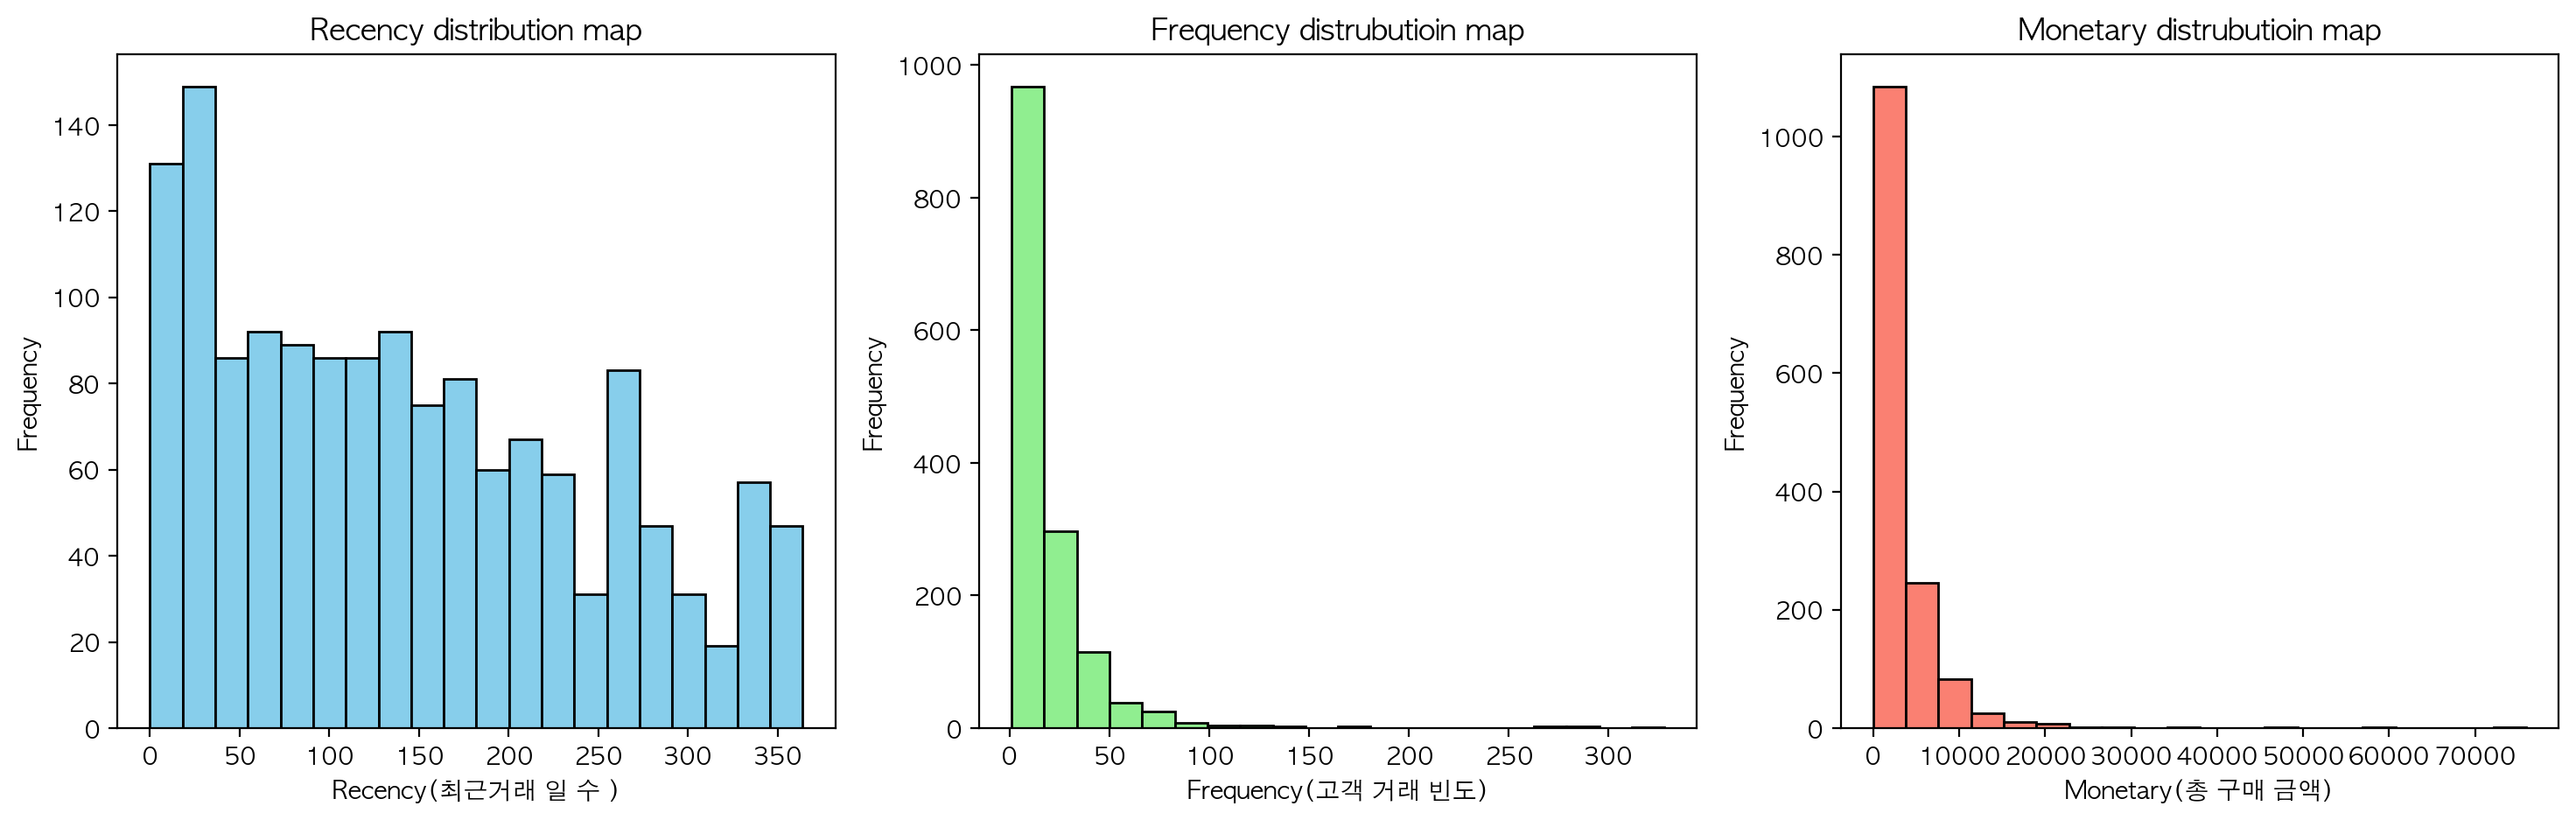

In [117]:
plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
plt.hist(rfm_data['Recency'], bins=20, color ='skyblue', edgecolor='black')
plt.xlabel('Recency(최근거래 일 수 )')
plt.ylabel('Frequency')
plt.title('Recency distribution map')

plt.subplot(1,3,2)
plt.hist(rfm_data['Frequency'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Frequency(고객 거래 빈도)')
plt.ylabel('Frequency')
plt.title('Frequency distrubutioin map')

plt.subplot(1,3,3)
plt.hist(rfm_data['Monetary'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Monetary(총 구매 금액)')
plt.ylabel('Frequency')
plt.title('Monetary distrubutioin map')


### 2.3 고객 세분화 결과 시각화

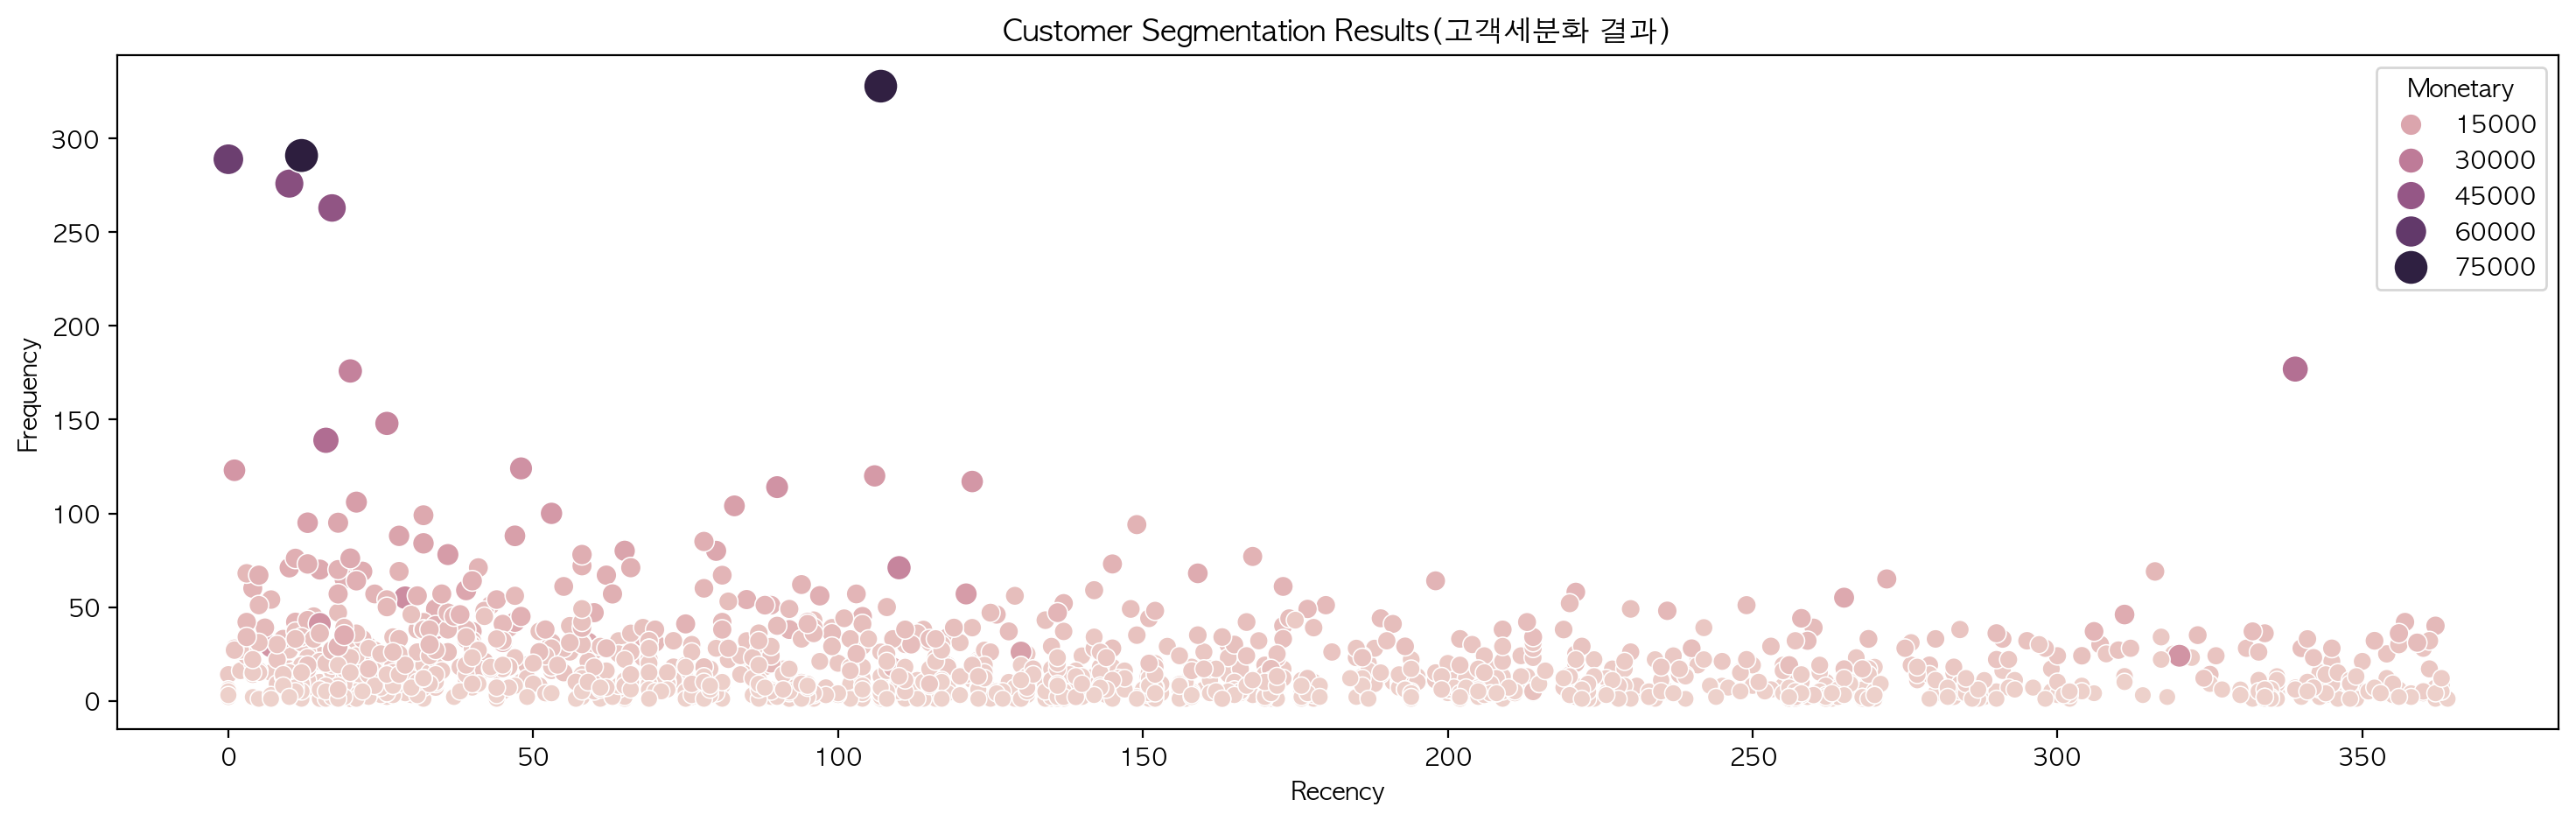

In [118]:
plt.figure(figsize=(18,5))
sns.scatterplot(x='Recency', y='Frequency', hue='Monetary', data = rfm_customer_data, size ='Monetary', sizes=(50,200))
plt.title('Customer Segmentation Results(고객세분화 결과)')
plt.show()

#### 고객 세분화 - RFM 분석 (분석)
##### 1. RFM 시각화 (분석)
#### RFM이란
#### 고객의 최근성, 빈도, 지출에 따라서 분석하는 기법이다.
#### 
#### 1. 그래프 해석
##### - R(Recency(최근성))
#####    - x축 낮은 값은 최근에 구매한 고객을 나타낸다. 0에 수렴할수록 최근에 구매한 고객이며, 값이 커질수록 오래전에 구매한 고객이라고 볼 수 있다.
##### - F(Frequency(제품 거래 빈도))
#####    - y축 높은 값은 제품을 더 자주 구매하는 고객을 나타낸다. 값이 높은 위치에 있는 고객들은 더 많은 거래를 한 고객이다. 
##### - M(Monetary(지출))
#####    - 점의 크기와 색상 : 점의 크기와 점의 색상이 클수록 더 많은 돈을 지출한 고객이다.
#####
#### 2. 그래프 분석 주요 특징
##### 1. 대부분의 고객들은 낮은 빈도와 금액을 가지고 있다. x축의 분포도에 작은 점들로 표시가 된 것을 볼 수 있다.
##### 2. 소수의 고객은 매우 높은 빈도와 금액을 가지고 있다. 이는 그래프 y축 상단에서 점의 크기와 색상이 다른 것을 볼 수 있다.
##### 3. 최근에 구매한 고객들은 빈도와 금액이 다양하게 표시가 된다.
#####
#### 3. 결론
##### 1. 고객 등급(예 실버 골드, vip 등)
##### - 도출 지표 : Frequency와 Monetary 값으로 도출 가능
##### = Frequency와 Monetary의 높은 값을 차지 하는 고객은 소수이며, 비즈니스에 매우 가치이쓴 고객이라고 할 수 있다.
##### = 집중적으로 고객관리 또는 맞춤형 마케팅 전략의 대상이 되어야한다.
##### 2. 잠재적 이탈 고객 방지
##### - 도출 지표 : Recency 값이 높은 값을 차지하는 사람이다. 
##### = 잠재적으로 이탈 가능성이 큰 고객들이다. 고객들을 이탈방지를 할 수 이는 방안 또는 마케팅이 필요
##### 3. 일반 고객
##### - 도출 지표: 낮은 Frequency와 Monetary 값으로 도출 가능
##### = 대다수의 고객이 일반고객이고, 일반 고객들의 구매 빈도와 금액을 증가시킬 수 있는 방안 또는 마케팅이 필요


#### 

### Monetary 값으로 고객 세분화 및 시각화 (정규화 먼저 실행)

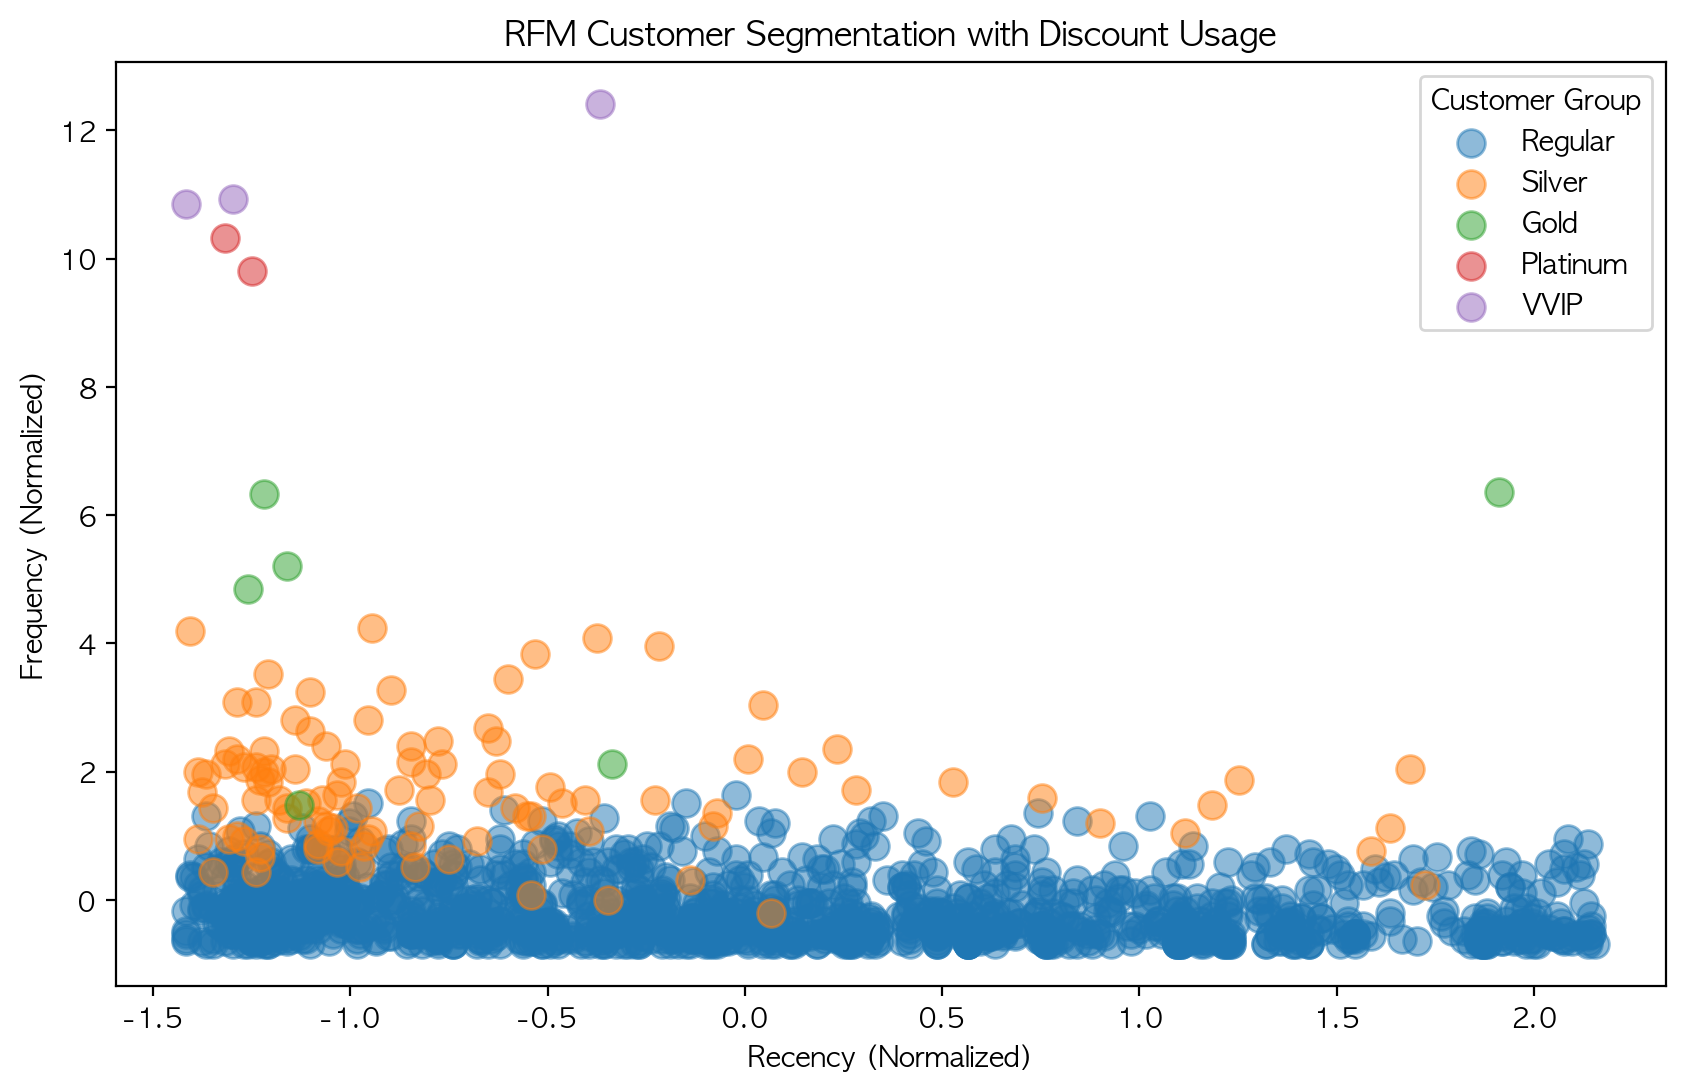

In [119]:
from sklearn.preprocessing import StandardScaler

# 데이터 정규화
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_customer_data[['Recency', 'Frequency', 'Monetary']])
rfm_customer_data[['Recency', 'Frequency', 'Monetary']] = rfm_normalized

def label_customer_group(value):
    if value > 10:
        return 'VVIP'
    elif value > 7:
        return 'Platinum'
    elif value > 4:
        return 'Gold'
    elif value > 1:
        return 'Silver'
    else:
        return 'Regular'

# MonetaryValue 값에 따라 새로운 라벨 컬럼을 생성
rfm_customer_data['CustomerGroup'] = rfm_customer_data['Monetary'].apply(label_customer_group)

# 시각화
plt.figure(figsize=(10, 6))
for group in ['Regular', 'Silver', 'Gold', 'Platinum', 'VVIP']:
    subset = rfm_customer_data[rfm_customer_data['CustomerGroup'] == group]
    plt.scatter(subset['Recency'], subset['Frequency'], s=100, label=group, alpha=0.5)  # alpha 값을 조정하여 색상을 연하게 만듭니다.
plt.legend(title='Customer Group')
plt.xlabel('Recency (Normalized)')
plt.ylabel('Frequency (Normalized)')
plt.title('RFM Customer Segmentation with Discount Usage')
plt.show()

##### 고객등급은 구매금액 및 횟수와 관련이 있기 때문에 Monetary(구매금액)을 활용하여 고객등급을 분류하였다.
##### 고객등급 분류 기준은 아직 정해진것이 없어서 신세계 백화점 고객등급을 예시로 들어서 사용하였다.
##### 고객등급은
##### 'VVIP', 'Diamond', 'Platinum', 'Gold', 'Silver', 'Normal'이다.
##### 고객등급이 높아질수록 소수의 고객이 분포하는 것을 볼 수 있다. 

### 3. 좀 더 깊이 세분화를 통해 고객을 분류해보자 - K-means clustering
#### 3.1 최적의 K값 탐색
#### - K-means 알고리즘을 사용할 때 가장 중요한 문제 중 하나는 적절한 k값을 선택하는 것이다.
#### 3.1.1 엘보우 방법
엘보우 방법은 k-means 알고리즘을 실행할 때, 클러스터 개수(k)를 점차 증가시키면서 클러스터링을 수행하고, 이에따른 SSE(Sum of Squared Error)값을 계산하여 그래프로 나타내어 최적의 값을 선택하는 방법이다.

SSE는 각 데이터 포인트와 해당 클러스터 중심점 사이의 거리를 제곱한 값의 합을 의미한다. SSE 값이 작을수록 클러스터링의 성능이 좋다고 판단할 수 있다. 그래서 엘보우 방법에서는 클러스터 개수(k)를 증가시키면서 SSE 값을 계싼하고, 이를 그래프로 나타낸다. 이때 SSE 값이 감소하는 정도가 급격하게 줄어드는 지점을 최적의 k값으로 선택한다.

#### 
#### 3.1.2 실루엣 분석
실루엣 분석은 각 데이터 포인트가 속한 클러스터의 일관성을 측정하여 최적의 k값을 찾는 방법이다. 각 데이터 포인트의 실루엣 계수를 계산하여, 전체 데이터 포인트의 평균 실루엣 계수를 구한다.
실루엣 계수는 클러스터의 일관성을 나타내며, 값이 높을수록 클러스터링 결과가 좋다는 것을 의미한다.
- 실루엣 계수는 다음과 같이 계산된다.
  1. 데이터 포인트 i와 같은 클러스터 내의 모든 데이터 포인트 간의 거리의 평균을 a(i)로 계산한다.
  2. 데이터 포인트 i와 가장 가까운 클러스터의 모든 데이터 포인트 간의 거리의 평균을 b(i)로 계산한다.
  3. 데이터 포인트 i와 실루엣 계수 s(i)는 (b(i) - a(i)) / max(a(i), b(i))로 계산된다.

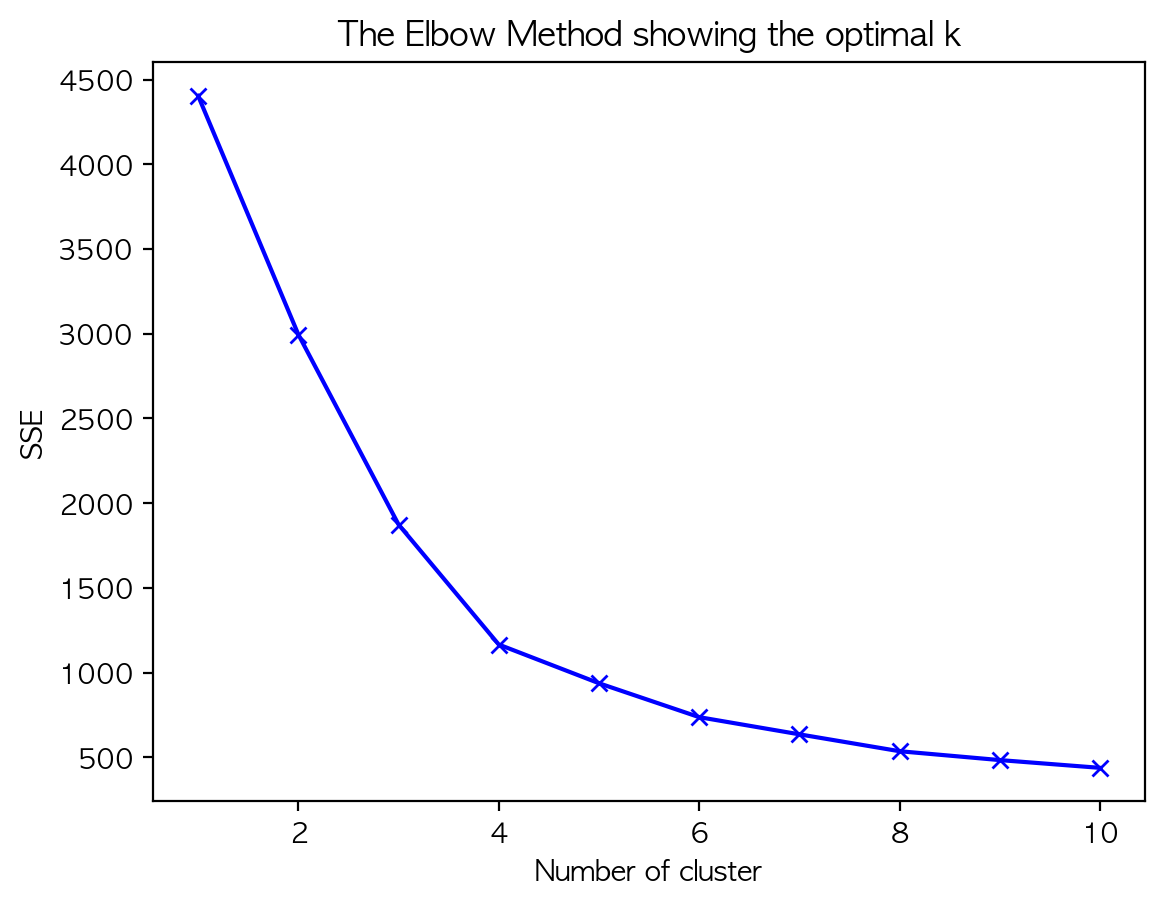

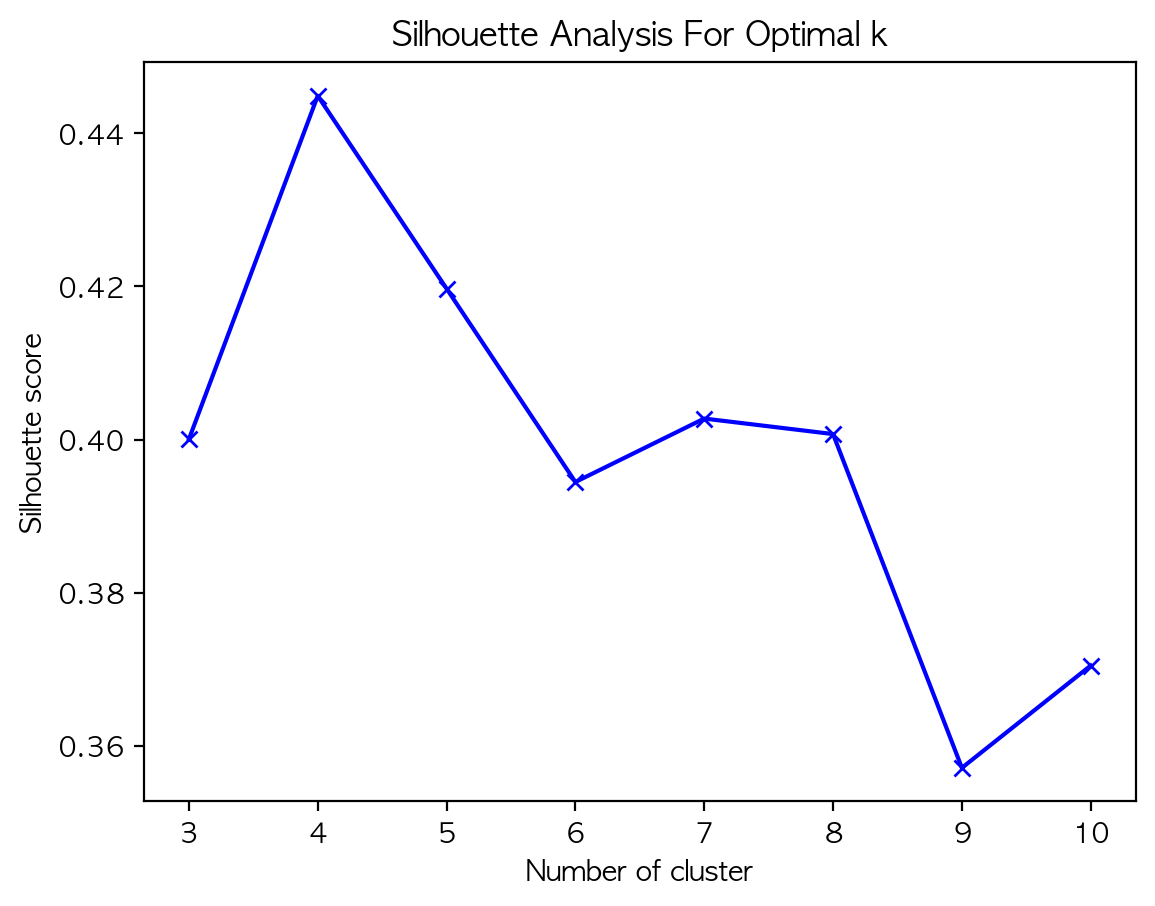

In [120]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# # 데이터 정규화
#scaler = StandardScaler()
#rfm_normalized = scaler.fit_transform(rfm_customer_data[['Recency', 'Frequency', 'Monetary']])

# 최적의 클러스터 수 찾기 (Elbow Method)
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_normalized)
    sse[k] = kmeans.inertia_  # SSE for each n_clusters

# 최적의 클러스터 수를 찾기 위한 SSE 값 시각화
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Silhouette 점수를 통한 클러스터 평가
silhouette_scores = {}
for k in range(3, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_normalized)
    score = silhouette_score(rfm_normalized, kmeans.labels_)
    silhouette_scores[k] = score

# 최적의 클러스터 수를 찾기 위한 Silhouette 점수 시각화
plt.figure()
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.title('Silhouette Analysis For Optimal k')
plt.show()

#### 엘보우 방법 및 실루엣 분석 (해석)
#### 1.엘보우 방법
##### 위 코드에서 range(1, 11)은 클러스터 개수(k)를 1부터 10까지 변화시키면서 SSE값을 계산하겠다는 의미이다. 
##### Kmeans 함수를 사용하여 K-means 알고리즘을 실행하고, interia_ 속성을 사용하여 SSE 값을 리스트에 추가하고 이를 그래프로 나타내었다.
##### SSE 값이 감소하는 정도가 급격하게 줄어드는 지점을 최적의 k값으로 선택한다. 이 그래프에서는 4로 볼 수 있다.
#### 2. 실루엣 분석
##### 위 코드에서 range(3, 11)은 클러스터 개수(k)를 2부터 10까지 변화시키면서 실루엣 계수를 계산하겠다는 의미이다. 
##### KMeans 함수를 사용하여 k-means 알고리즘을 실행하고, silhouette_score 함수를 사용하여 시루엣 계수를 계산한다.
##### 계산된 실루엣 계수를 리스트에 추가하고 이를 그래프로 나타낸 결과 최적의 값은 4로 볼 수 있다. 
### 

### 3.2 최적의 값 4로 클러스터링 시작

In [121]:
# KMeans 클러스터링 수행
optimal_clusters = max(silhouette_scores, key=silhouette_scores.get)
kmeans = KMeans(n_clusters=4, random_state=1)
rfm_customer_data['Cluster'] = kmeans.fit_predict(rfm_normalized)

# 클러스터별 기술통계
rfm_customer_discount_data['Cluster'] = rfm_customer_data['Cluster']
cluster_summary_with_id = rfm_customer_discount_data.groupby('Cluster')[['Recency','Frequency','Monetary']].mean()
cluster_summary_with_id

,Recency,Frequency,Monetary
Cluster,,,
0,254.932110,10.317431,1666.760587
1,78.485994,12.120448,1968.841989
2,65.125000,242.375000,50023.540000
3,81.208955,51.815920,9733.674627


##### 클러스터 0 (해석 예)
##### R 254.93 : 가장 오래전 구매한 그룹
##### F 10.32 : 구매 빈도가 가장 낮은 그룹
##### M 1666.76 : 지출액이 가장 적은 그룹
##### 해석: 비활성 고객들(구매빈도 및 지출액이 가장 낮음)

#####  고객을 Recency, Frequency, Monetary (RFM) 값에 따라 그룹화하였다. 각 클러스터의 평균값이 표기되어 있다.
##### 각 열의 평균값은 표준화된 점수로 표시되었다. 

In [122]:
# 각 클러스터별 고객 수 출력
cluster_counts = RFM_customer_data['Cluster'].value_counts()
print("클러스터별 고객 수")
cluster_counts

클러스터별 고객 수


1    714
0    545
3    201
2      8
Name: Cluster, dtype: int64

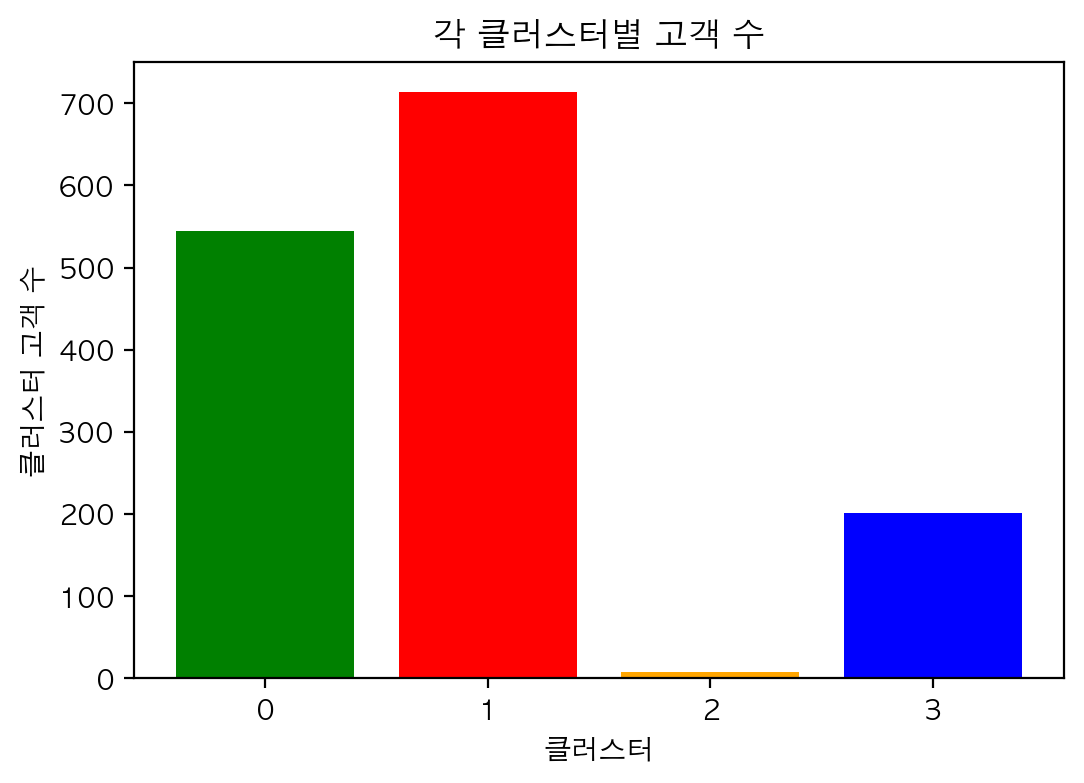

In [123]:
# 각 클러스터별 고객 수 시각화
plt.figure(figsize=(6, 4))
plt.bar(cluster_counts.index, cluster_counts.values, color=['red', 'green', 'blue', 'orange'])
plt.xlabel('클러스터')
plt.ylabel('클러스터 고객 수')
plt.title('각 클러스터별 고객 수')
plt.xticks(cluster_counts.index) #클러스터 값으로 설정
plt.show()


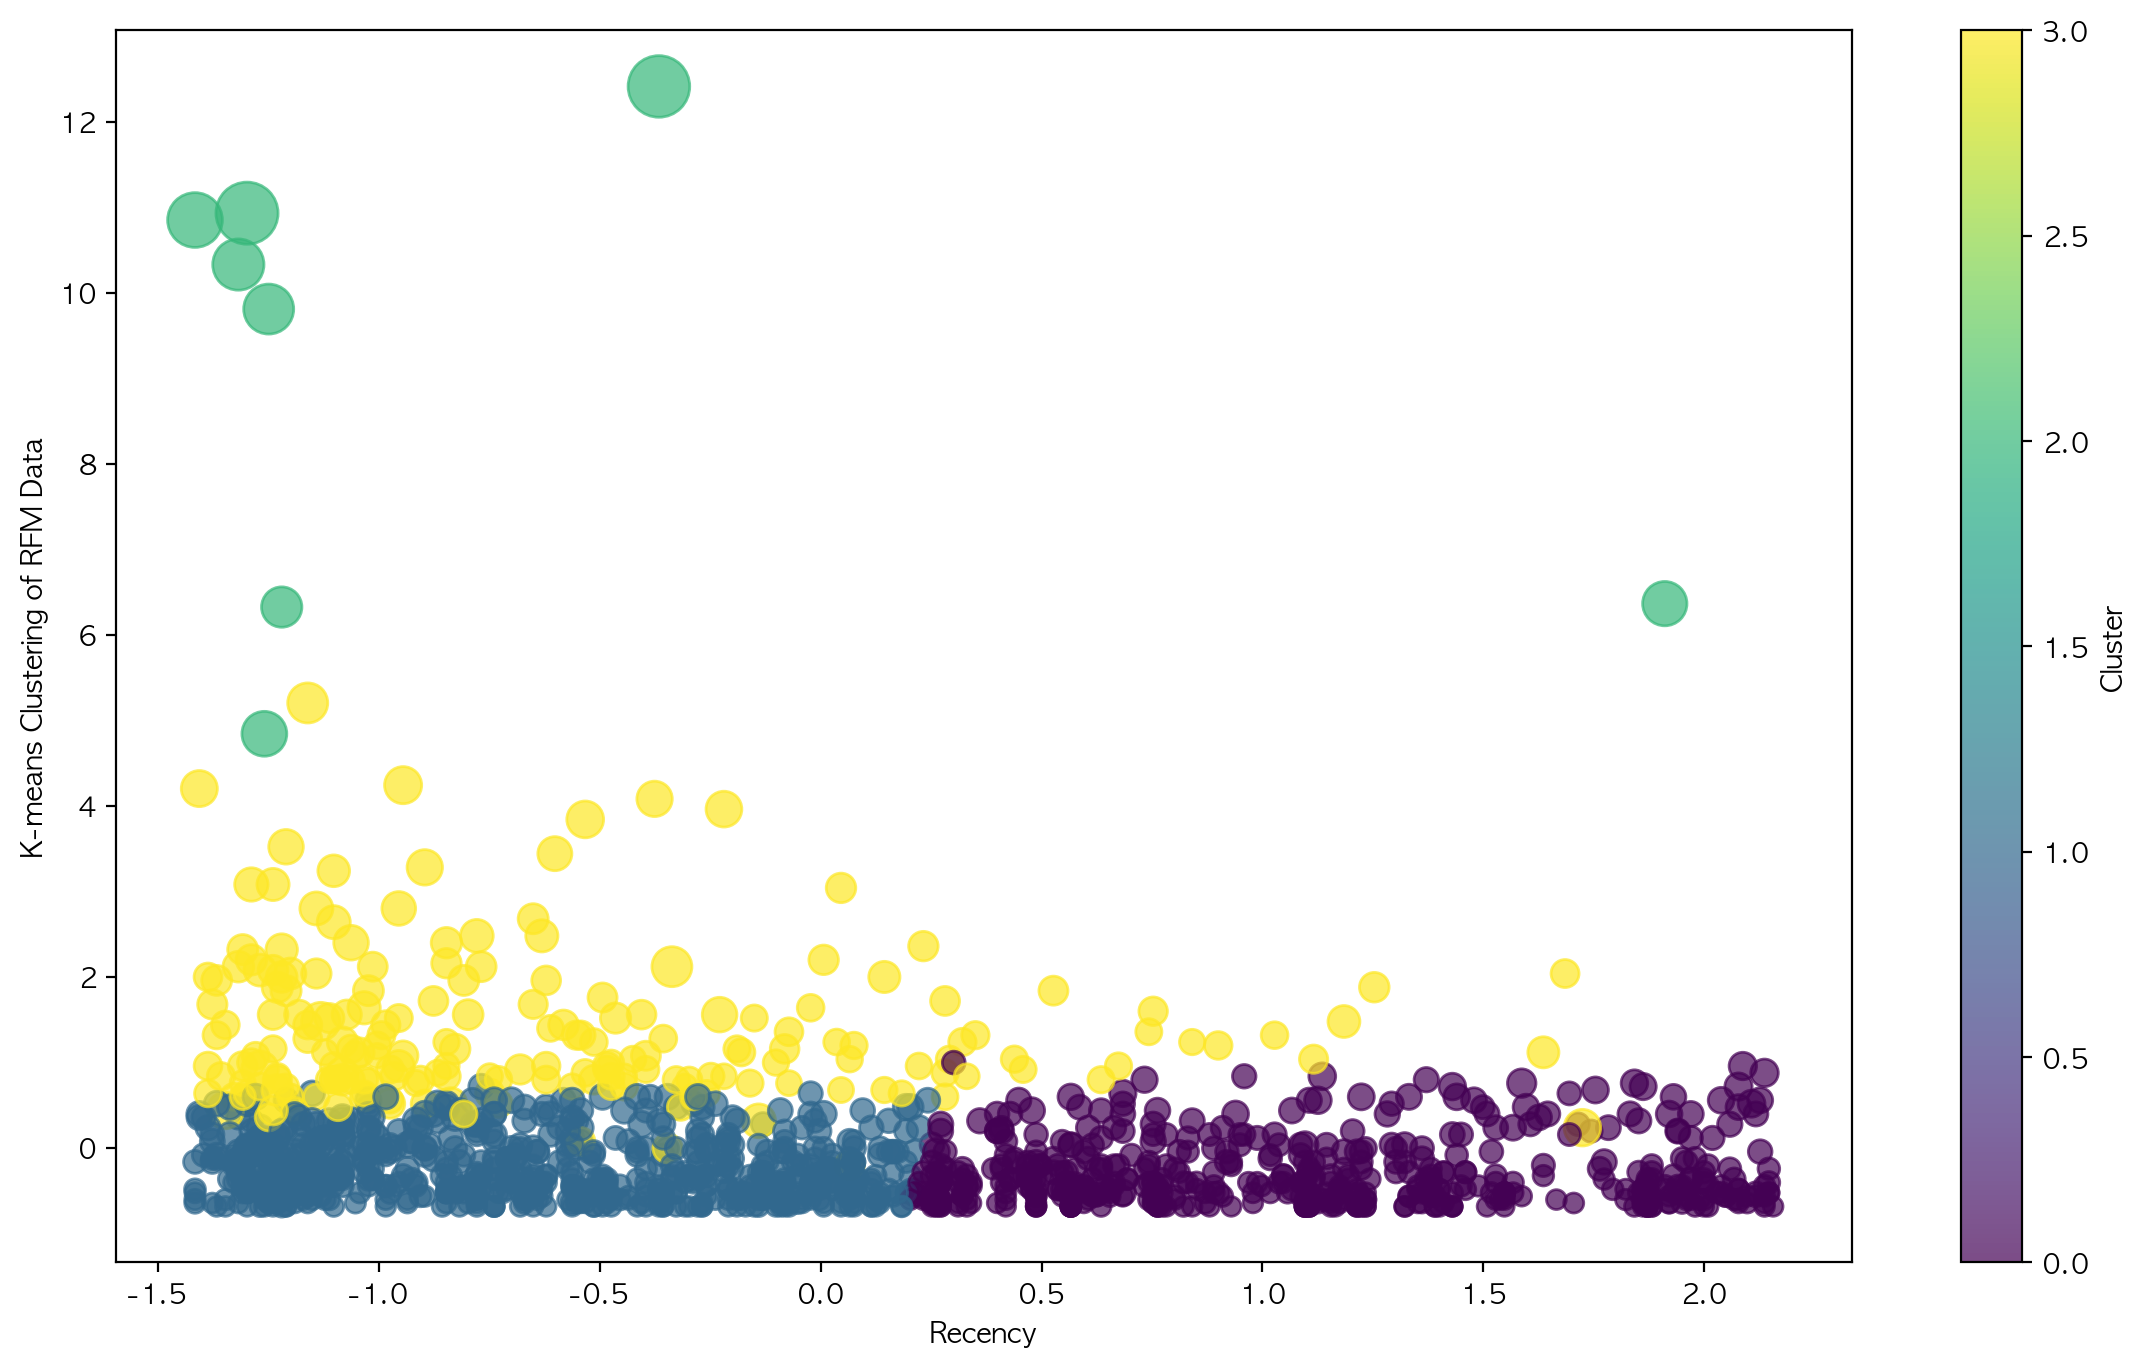

In [124]:
def map_monetary_to_size(monetary_value):
    min_size = 50
    max_size = 500
    min_value = rfm_customer_data['Monetary'].min() # 데이터프레임의 Monetary 중 최소값을 min_value에 저장
    max_value = rfm_customer_data['Monetary'].max()
    size = (monetary_value - min_value) / (max_value - min_value) * (max_size - min_size) + min_size
    return size

sizes = [map_monetary_to_size(value) for value in rfm_customer_data['Monetary']]

plt.figure(figsize=(14, 8))
plt.scatter(rfm_normalized[:,0], rfm_normalized[:,1], c=kmeans.labels_, marker='o', alpha=0.7, s=sizes)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.ylabel('K-means Clustering of RFM Data')
plt.colorbar(label='Cluster')
plt.show()


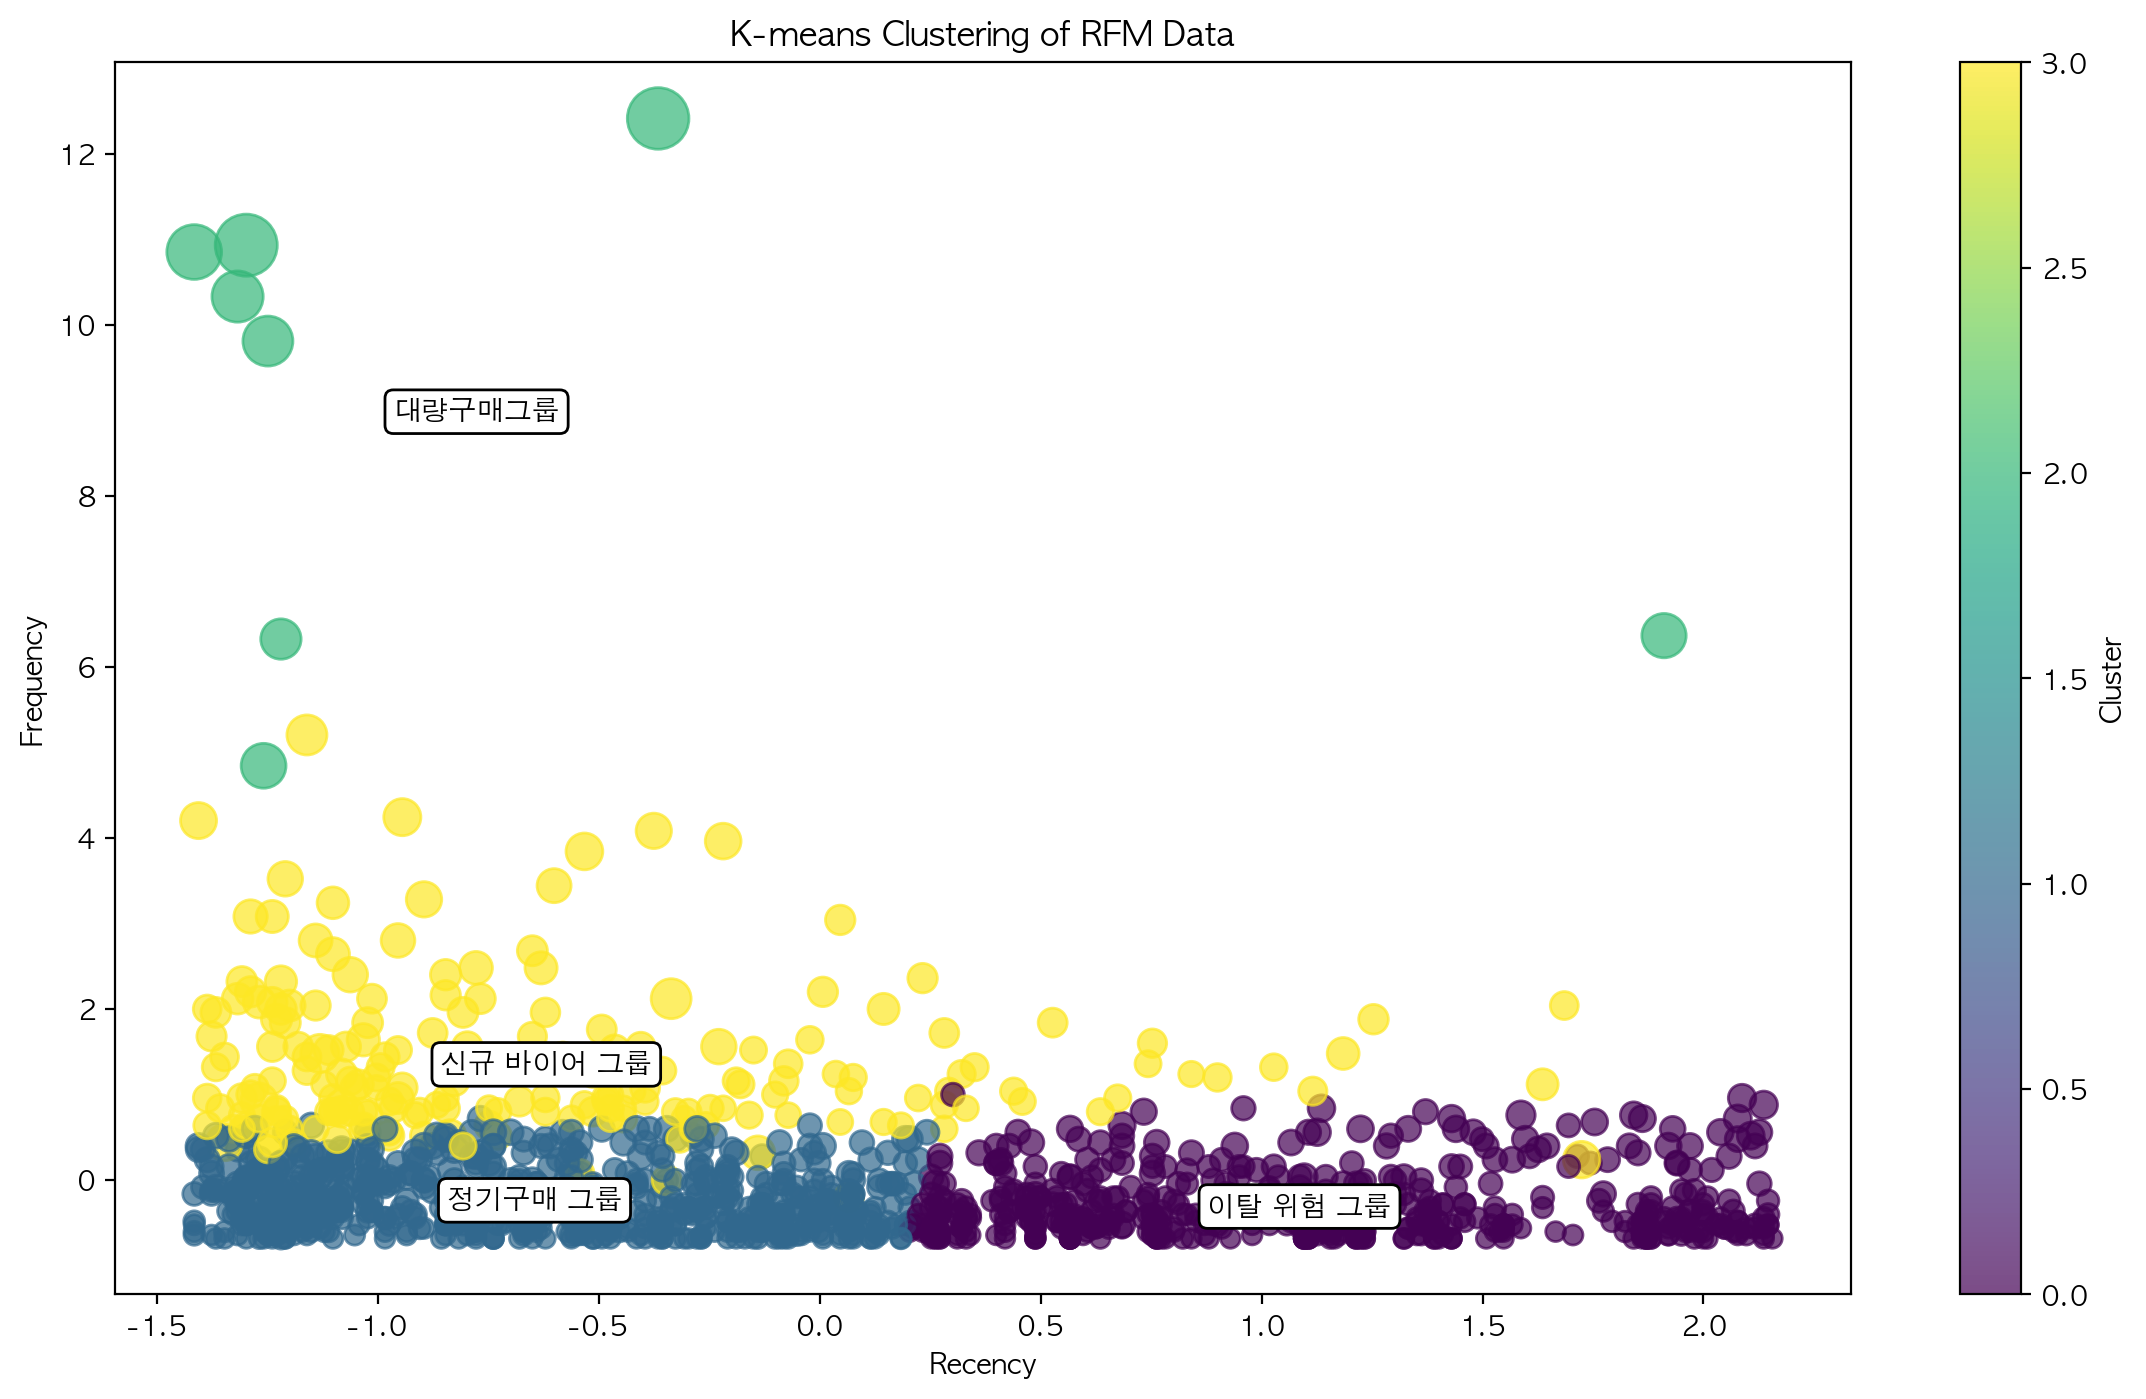

In [125]:
# 클러스터링 결과 시각화
plt.figure(figsize=(14, 8))
scatter = plt.scatter(rfm_normalized[:, 0], rfm_normalized[:, 1], c=kmeans.labels_, marker='o', alpha=0.7, s=sizes)

# 각 그룹의 이름을 지정
cluster_names = {
    0: '이탈 위험 그룹',
    1: '정기구매 그룹',
    2: '대량구매그룹',
    3: '신규 바이어 그룹'
}

# 그룹 설명을 그래프 안에 네모박스로 추가
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1, alpha=1.0)
for key, value in cluster_names.items():
    # 그룹의 중심 좌표 계산
    cluster_center = rfm_normalized[kmeans.labels_ == key].mean(axis=0)
    plt.text(cluster_center[0], cluster_center[1], value, ha='center', va='center', bbox=bbox_props)

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('K-means Clustering of RFM Data')
plt.colorbar(scatter, label='Cluster')
plt.show()

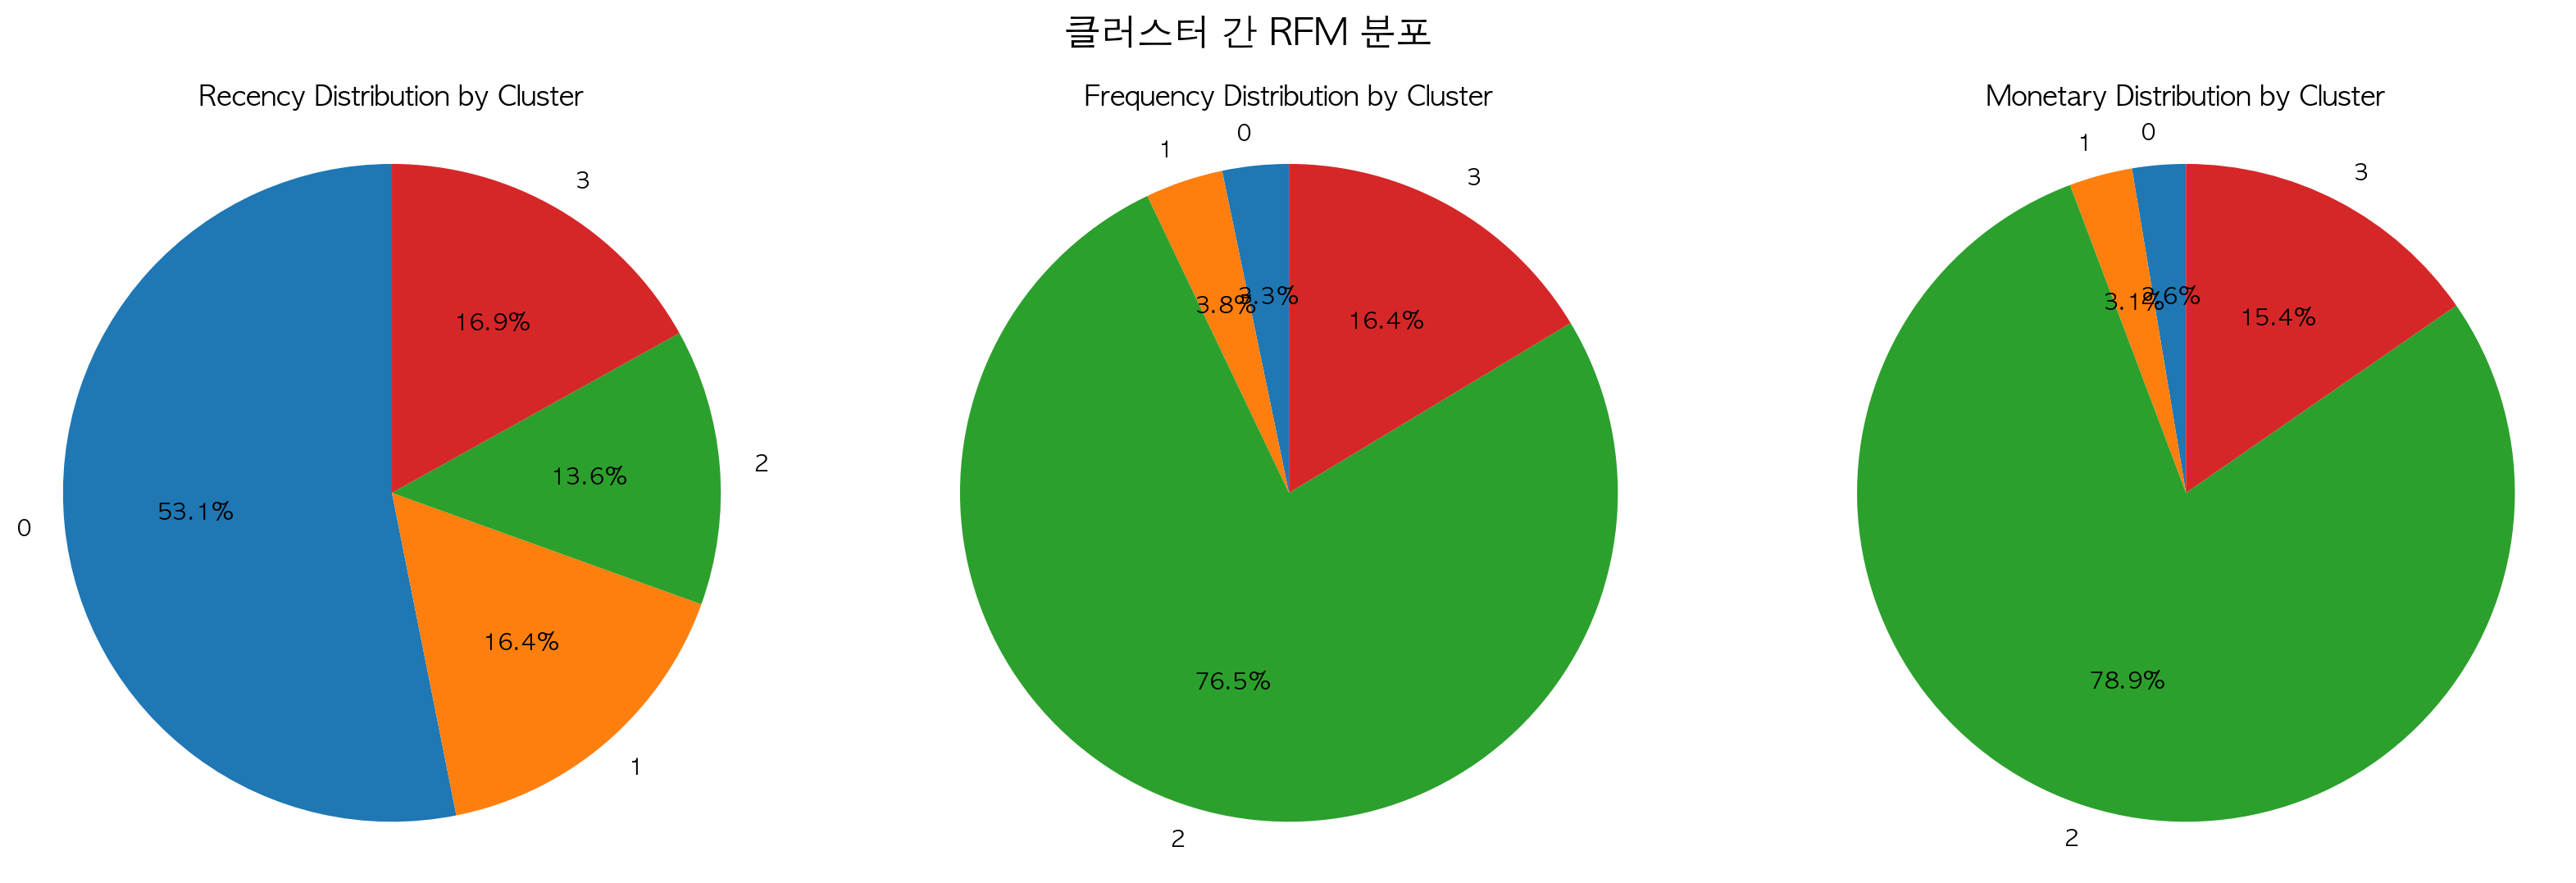

In [126]:
import matplotlib.pyplot as plt

# 클러스터별 평균 RFM 값 가져오기
cluster_avg = rfm_customer_discount_data.groupby('Cluster').mean()

# 각 RFM 컬럼을 클러스터의 평균으로 나누어 정규화
cluster_avg_norm = cluster_avg.div(cluster_avg.sum(axis=0), axis=1)

# 원형 차트 생성
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    ax[i].pie(cluster_avg_norm[col], labels=cluster_avg_norm.index, autopct='%1.1f%%', startangle=90,radius=1.1)
    ax[i].set_title(f'{col} Distribution by Cluster')

plt.suptitle('클러스터 간 RFM 분포', fontsize=16)
plt.show()

##### 기술 통계를 살펴보며 분류된 군집의 특징을 살펴보았다.
###### 
##### <Cluster 0 - 이탈 위험 그룹>
##### R 254.93 : 가장 오래전 구매한 그룹
##### F 10.32 : 구매 빈도가 가장 낮은 그룹
##### M 1666.76 : 지출액이 가장 적은 그룹
##### 해석 : 최근에 구매를 하지 않았고, 구매 빈도와 금액이 낮아 이탈할 가능성이 높은 편이다.
#####
##### <Cluster 1 - 정기적 구매 그룹>
##### R 78.49 : 비교적 최근에 구매한 그룹
##### F 12.12 : 구매 빈도가 낮은 편
##### M 1968.84 : 지출액이 낮은 그룹
##### 해석 : 정기적으로 제품을 구매하는 경향이 있다.
###### 
##### <Cluster 2 - 대량 구매 그룹>
##### R 65.13 : 가장 최근에 구매한 그룹
##### F 242 : 구매 빈도가 가장 높은 그룹
##### M 50023.54 : 지출액이 가장 많은 그룹
##### 해석 : 대량으로 제품을 구매하는 고객들로 이루어진 그룹이다.
###### 
##### <Cluster 3 - 신규 그룹>
##### R 81.21 : 비교적 최근에 구매한 그룹
##### F 51.82 : 중간 정도의 구매 빈도
##### M 9733 : 중간 정도의 지출액
##### 해석 : 최근에 구매를 시작한 신규 고객들로 이루어져 있을 것으로 예상된다.
##### 


##### 종합 분석
##### Cluster 2가 가장 가치 있는 고객군으로, 이들을 위한 VIP 프로그램이나 특별 서비스를 고려해야할 것 같다.
##### Cluster 3은 잠재력이 있는 그룹으로, 이들의 구매 빈도와 지출을 늘리기 위한 전략이 필요하다.
##### Cluster 1은 최근 구매했지만 빈도와 지출이 낮으므로, 재구매를 유도하는 마케팅이 효과적일 수 있다. 
##### Cluster 0은 재활성화가 필요한 그룹으로, 특별 프로모션이나 리인게이지먼트 캠페인을 하는게 효과적일 수 있다.